In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
def generate_line():
    
    d = 2
    
    p1 = np.random.rand(d)
    p2 = np.random.rand(d)
    
    a = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - a*p1[0]

    return np.array([b, a, -1])

def generate_data(line, n):
    points = np.dot(np.random.rand(n, line.shape[0]-1), 2) - 1
    
    return points

def calc_y(line, data):
    y = line[0] + np.dot(data, line[1:])
    
    y = np.where(y > 0, 1, -1)
    
    return y

In [3]:
def perceptron(data, y, weights=None):
    if weights is None:
        weights = np.zeros(data.shape[1]+1 if len(data.shape) > 1 else 1)
        
    it = 0
    
    m_data = np.concatenate((np.ones((data.shape[0], 1)), data), axis=1)
    
    miscl_mask = np.ones(m_data.shape[0], dtype=bool)
    
    miscl_data = m_data[miscl_mask]
    
    while miscl_data.shape[0] > 0:
        
        miscl_y = y[miscl_mask]

        i = np.random.randint(miscl_data.shape[0])

        weights += miscl_y[i] * miscl_data[i]

        temp = np.sign(np.dot(m_data, weights))
        
        miscl_mask = np.array( temp - y, dtype=bool)
        miscl_data = m_data[miscl_mask]
        
        it += 1
        
    return weights, it

In [4]:
def plot_experiment(data, y, line, w_line):
    colormap = [ 'r' if y_n > 0 else 'g' for y_n in y ]
    
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])
    
    f = lambda x: -(line[0]/line[2] + (line[1]/line[2]) * x)
    g = lambda x: -(w_line[0]/w_line[2] + (w_line[1]/w_line[2]) * x)
    
    bounds = np.array([-1, 1])
    
    f_y = f(bounds)
    g_y = g(bounds)
    
    plt.plot(bounds, f_y, label='f(x)')
    plt.plot(bounds, g_y, label='g(x)')
    
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
    plt.scatter(data[:, 0], data[:, 1], c=colormap)
    plt.show()

In [5]:
def experiment(N, plot=False):
    
    line = generate_line()
    data = generate_data(line, N)
    y = calc_y(line, data)
    
    w, it = perceptron(data, y)

    if plot:
        plot_experiment(data, y, line, w)
        
    else:
        error = calc_error(line, w)
        
        return [it, error]
    
def calc_error(line, w):
    
    ev_data = generate_data(line, 1000)
    ev_f_y = calc_y(line, ev_data)
    ev_g_y = calc_y(w, ev_data)
    
    misclassified = np.count_nonzero(ev_f_y - ev_g_y)

    return misclassified / ev_data.shape[0]

In [6]:
def run_experiment(N, num_exp, processes=None):
    pool = mp.Pool(processes)
    
    results = np.array(pool.map(experiment, [N] * num_exp))
    
    return np.mean(results, axis=0)

In [13]:
question_1, question_2 = run_experiment(10, 1000)
question_3, question_4 = run_experiment(100, 1000)


print('Questão 1:', question_1)
print('Questão 2:', question_2)

print('Questão 3:', question_3)
print('Questão 4:', question_4)

Questão 1: 8.943
Questão 2: 0.097891
Questão 3: 84.382
Questão 4: 0.012959


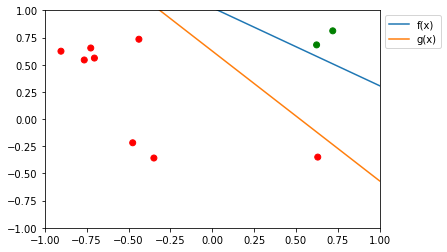

In [8]:
experiment(10, True)